In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/roni/.virtualenvs/metnumtp3/bin/python (found version "3.8.5") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/roni/Documents/metnum/metnum-tp3
-- Configuring done
-- Ge

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
from commons import linear_regression

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/roni/Documents/metnum/metnum-tp3/notebooks
Python 3.8.5


In [3]:
df = pd.read_csv('../data/train.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240000 non-null  int64  
 1   titulo                      234613 non-null  object 
 2   descripcion                 238381 non-null  object 
 3   tipodepropiedad             239954 non-null  object 
 4   direccion                   186928 non-null  object 
 5   ciudad                      239628 non-null  object 
 6   provincia                   239845 non-null  object 
 7   antiguedad                  196445 non-null  float64
 8   habitaciones                217529 non-null  float64
 9   garages                     202235 non-null  float64
 10  banos                       213779 non-null  float64
 11  metroscubiertos             222600 non-null  float64
 12  metrostotales               188533 non-null  float64
 13  idzona        

### Prediccion de cantidad de habitaciones
¿Se puede predecir la cantidad de habitaciones en base a la cantidad de metros cubiertos y el tipo de propiedad?

- Dataset: Solo vamos a incluir aquellos datos que contengan metroscubiertos y habitaciones. 
- Input: `metroscubiertos`,`itipodepropiedad`
- Output: `habitaciones`

In [50]:
from sklearn.metrics import r2_score
df_metricas_res_exp = pd.DataFrame(columns=["tipodepropiedad","RMSLE","R2_SCORE","RMSE","STD"])
for t in df.tipodepropiedad.unique():
    df_propiedad = df[df["tipodepropiedad"] == t]
    if df_propiedad.shape[0] < 100:
        continue
    res_propiedad, rmse_propiedad, rmsle_propiedad = linear_regression(df_propiedad,["metroscubiertos"], "habitaciones", n_splits=4, shuffle=True) 
    r2 = np.mean([r2_score(r["expect"],r["pred"]) for r in res_propiedad])
    df_metricas_res_exp = df_metricas_res_exp.append({"tipodepropiedad":t,"RMSLE":rmsle_propiedad,"R2_SCORE":r2,"RMSE":rmse_propiedad,"STD":df_propiedad.habitaciones.std()}, ignore_index=True)
df_metricas_res_exp["RMSE/STD"] = df_metricas_res_exp["RMSE"]/df_metricas_res_exp["STD"]
df_metricas_res_exp

,tipodepropiedad,RMSLE,R2_SCORE,RMSE,STD,RMSE/STD
0,Apartamento,0.421901,-1.849817,1.356053,0.630951,2.149221
1,Casa en condominio,0.431704,-3.171141,1.457328,0.611669,2.382546
2,Casa,0.455439,-1.337390,1.635132,0.881185,1.855606
3,Terreno,0.591668,-0.140509,2.136676,1.563844,1.366298
4,Terreno comercial,0.556231,-0.307456,2.192588,1.598060,1.372031
5,Local Comercial,0.663543,0.246007,2.675050,2.274067,1.176329
6,Quinta Vacacional,0.454216,-0.081040,1.614350,1.184358,1.363059
7,Oficina comercial,0.701988,0.010737,2.994039,2.396718,1.249225
8,Edificio,0.620289,-0.117623,3.429628,2.973381,1.153444
9,Casa uso de suelo,0.469505,0.008587,2.403524,2.065912,1.163420


In [51]:
df_metricas_res_exp.mean()

RMSLE       0.519909
R2_SCORE   -1.819643
RMSE        2.045370
STD         1.518339
RMSE/STD    1.492107
dtype: float64

In [13]:
df.ciudad.value_counts()[:10]

Querétaro              12646
Benito Juárez          11014
Zapopan                10360
San Luis Potosí         7925
Mérida                  7162
Monterrey               6946
Alvaro Obregón          6633
Cuauhtémoc              6614
Naucalpan de Juárez     6554
Miguel Hidalgo          5795
Name: ciudad, dtype: int64

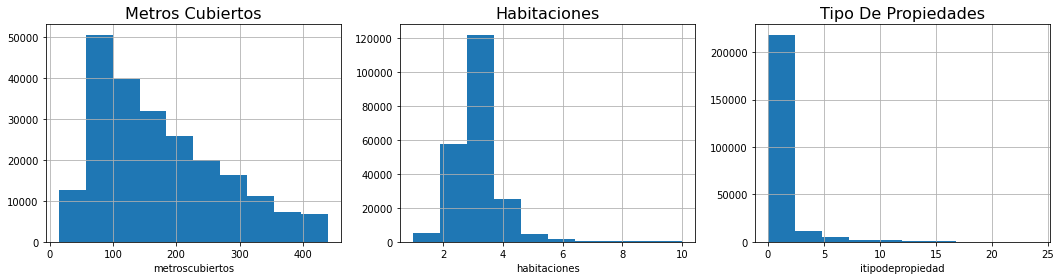

In [14]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,4))
df.metroscubiertos.hist(ax=ax1)
ax1.set_title("Metros Cubiertos", fontsize=16)
df.habitaciones.hist(ax=ax2)
ax2.set_title("Habitaciones", fontsize=16)
df.itipodepropiedad.hist(ax=ax3)
ax3.set_title("Tipo De Propiedades", fontsize=16)
ax1.set_xlabel("metroscubiertos")
ax2.set_xlabel("habitaciones")
ax3.set_xlabel("itipodepropiedad")
plt.savefig("habitaciones/dataset_analisis")
plt.show()

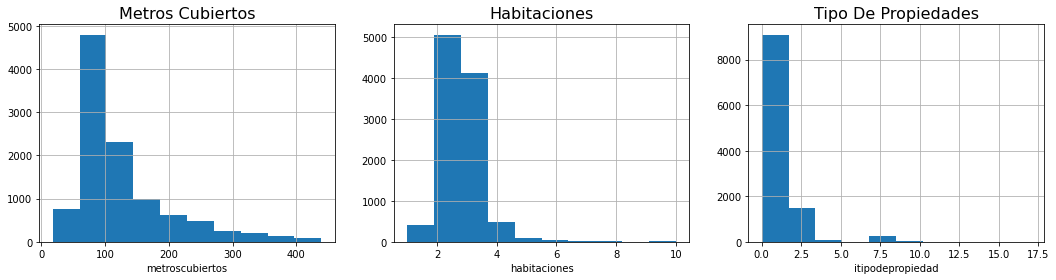

In [15]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,4))
df[df["ciudad"] == "Benito Juárez"].metroscubiertos.hist(ax=ax1)
ax1.set_title("Metros Cubiertos", fontsize=16)
df[df["ciudad"] == "Benito Juárez"].habitaciones.hist(ax=ax2)
ax2.set_title("Habitaciones", fontsize=16)
df[df["ciudad"] == "Benito Juárez"].itipodepropiedad.hist(ax=ax3)
ax3.set_title("Tipo De Propiedades", fontsize=16)
ax1.set_xlabel("metroscubiertos")
ax2.set_xlabel("habitaciones")
ax3.set_xlabel("itipodepropiedad")
plt.savefig("habitaciones/benito_analisis")
plt.show()

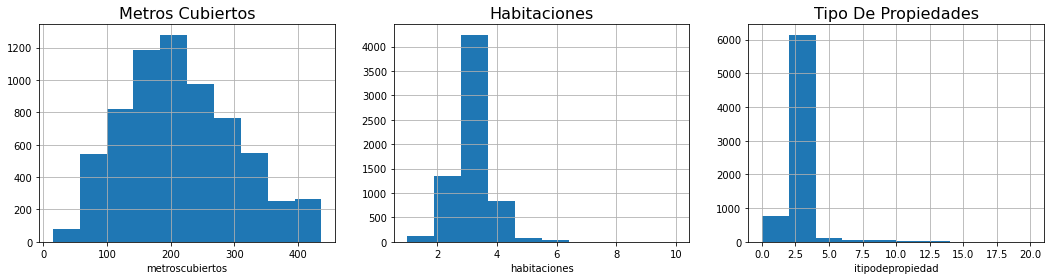

In [16]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,4))
df[df["ciudad"] == "Mérida"].metroscubiertos.hist(ax=ax1)
ax1.set_title("Metros Cubiertos", fontsize=16)
df[df["ciudad"] == "Mérida"].habitaciones.hist(ax=ax2)
ax2.set_title("Habitaciones", fontsize=16)
df[df["ciudad"] == "Mérida"].itipodepropiedad.hist(ax=ax3)
ax3.set_title("Tipo De Propiedades", fontsize=16)
ax1.set_xlabel("metroscubiertos")
ax2.set_xlabel("habitaciones")
ax3.set_xlabel("itipodepropiedad")
plt.savefig("habitaciones/merida_analisis")
plt.show()

In [6]:
df_exp1 = df[df["ciudad"] == "Benito Juárez"]

In [11]:
from sklearn.metrics import r2_score
df_metricas_res_exp1 = pd.DataFrame(columns=["tipodepropiedad","RMSLE","R2_SCORE","RMSE","STD"])
for t in df_exp1.tipodepropiedad.unique():
    df_propiedad = df_exp1[df_exp1["tipodepropiedad"] == t]
    if df_propiedad.shape[0] < 100:
        continue
    res_propiedad, rmse_propiedad, rmsle_propiedad = linear_regression(df_propiedad,["metroscubiertos"], "habitaciones", n_splits=4, shuffle=True) 
    r2 = np.mean([r2_score(r["expect"],r["pred"]) for r in res_propiedad])
    df_metricas_res_exp1 = df_metricas_res_exp1.append({"tipodepropiedad":t,"RMSLE":rmsle_propiedad,"R2_SCORE":r2,"RMSE":rmse_propiedad,"STD":df_propiedad.habitaciones.std()}, ignore_index=True)
df_metricas_res_exp1["RMSE/STD"] = df_metricas_res_exp1["RMSE"]/df_metricas_res_exp1["STD"]
df_metricas_res_exp1

,tipodepropiedad,RMSLE,R2_SCORE,RMSE,STD,RMSE/STD
0,Apartamento,0.328189,-1.078706,1.117033,0.588276,1.898825
1,Casa,0.372681,-0.319060,1.594999,1.192107,1.337967
2,Casa en condominio,0.257998,-2.053600,0.959494,0.458049,2.094744
3,Terreno,0.387328,-2.531415,1.753980,1.218762,1.439149
4,Oficina comercial,0.686801,-0.330187,2.965635,2.348609,1.262720


In [12]:
df_metricas_res_exp1.mean()

RMSLE       0.406600
R2_SCORE   -1.262594
RMSE        1.678228
STD         1.161161
RMSE/STD    1.606681
dtype: float64

In [17]:
df_exp2 = df[df["ciudad"] == "Mérida"]

In [24]:
from sklearn.metrics import r2_score
df_metricas_res_exp2 = pd.DataFrame(columns=["tipodepropiedad","RMSLE","R2_SCORE","RMSE","STD"])
for t in df_exp2.tipodepropiedad.unique():
    df_propiedad = df_exp2[df_exp2["tipodepropiedad"] == t]
    if df_propiedad.shape[0] < 100:
        continue
    res_propiedad, rmse_propiedad, rmsle_propiedad = linear_regression(df_propiedad,["metroscubiertos"], "habitaciones", n_splits=4, shuffle=True) 
    r2 = np.mean([r2_score(r["expect"],r["pred"]) for r in res_propiedad])
    df_metricas_res_exp2 = df_metricas_res_exp2.append({"tipodepropiedad":t,"RMSLE":rmsle_propiedad,"R2_SCORE":r2,"RMSE":rmse_propiedad,"STD":df_propiedad.habitaciones.std()}, ignore_index=True)
df_metricas_res_exp2["RMSE/STD"] = df_metricas_res_exp2["RMSE"]/df_metricas_res_exp2["STD"]
df_metricas_res_exp2

,tipodepropiedad,RMSLE,R2_SCORE,RMSE,STD,RMSE/STD
0,Casa,0.354403,-1.295619,1.277965,0.672757,1.899594
1,Terreno,0.369512,-1.272575,0.956462,0.726483,1.316565
2,Casa en condominio,0.274329,-2.084892,1.050570,0.550869,1.907112
3,Apartamento,0.363316,-0.148187,1.103973,0.702569,1.571338


In [25]:
df_metricas_res_exp2.mean()

RMSLE       0.340390
R2_SCORE   -1.200318
RMSE        1.097243
STD         0.663170
RMSE/STD    1.673652
dtype: float64

### Metrics Comparison

In [46]:
from sklearn.metrics import r2_score
df_metricas_ciudad = pd.DataFrame(columns=["ciudad","tipodepropiedad","RMSLE","R2_SCORE","RMSE","STD"])
for c in df.ciudad.unique():
    df_ciudad = df[df["ciudad"] == c]
    for t in df_ciudad.tipodepropiedad.unique():
        df_propiedad = df_ciudad[df_ciudad["tipodepropiedad"] == t]
        if df_propiedad.dropna().shape[0] < 20:
            continue
        res_propiedad, rmse_propiedad, rmsle_propiedad = linear_regression(df_propiedad,["metroscubiertos"], "habitaciones", n_splits=4, shuffle=True) 
        r2 = np.mean([r2_score(r["expect"],r["pred"]) for r in res_propiedad])
        df_metricas_ciudad = df_metricas_ciudad.append({"ciudad":c,"tipodepropiedad":t,"RMSLE":rmsle_propiedad,"R2_SCORE":r2,"RMSE":rmse_propiedad,"STD":df_propiedad.habitaciones.std()}, ignore_index=True)

df_metricas_ciudad["RMSE/STD"] = df_metricas_ciudad["RMSE"]/df_metricas_ciudad["STD"]
df_metricas_ciudad

,ciudad,tipodepropiedad,RMSLE,R2_SCORE,RMSE,STD,RMSE/STD
0,Benito Juárez,Apartamento,0.328189,-1.078706,1.117033,0.588276,1.898825
1,Benito Juárez,Casa,0.372681,-0.319060,1.594999,1.192107,1.337967
2,Benito Juárez,Casa en condominio,0.257998,-2.053600,0.959494,0.458049,2.094744
3,La Magdalena Contreras,Casa en condominio,0.230507,-3.040699,0.888188,0.438332,2.026290
4,La Magdalena Contreras,Apartamento,0.410801,-1.786988,1.325464,0.630791,2.101273
...,...,...,...,...,...,...,...
216,El Salto,Casa,0.546026,-0.525086,2.010350,1.456022,1.380714
217,Medellín,Casa,0.431662,-2.424403,1.313706,0.613435,2.141556
218,Córdoba,Casa,0.424969,-0.890785,1.542902,0.767661,2.009876
219,Chicoloapan,Casa,0.509931,-0.582422,1.995181,1.054595,1.891892


In [52]:
df_metricas_ciudad.groupby(["tipodepropiedad"]).mean().mean()

RMSLE       0.370575
R2_SCORE   -1.753257
RMSE        1.335785
STD         0.693984
RMSE/STD    1.964306
dtype: float64